In [79]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.patches as mpatches

In [202]:
#load the file

file = pd.read_excel('p30_mismatchclusters.xlsx', index_col=0)

file

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
51,4571,AMAAVVVAA,REF,0.288176,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7
52,4571,AMAAVVVAA,REF,0.218419,0.024018,0.243726,NaN,NaN,NaN,6,68255,MM01,7
53,4571,AMAAVVVAA,REF,0.218139,0.033181,0.051500,NaN,NaN,NaN,6,262786,AB19,7
54,4571,AMAAVVVAA,REF,0.293512,0.048707,0.156396,NaN,NaN,NaN,6,111614,AB18,7
55,4571,ALCVVAVA,NOV,0.157599,0.024223,0.032699,NaN,NaN,NaN,6,105681,AB16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,4801,SEAAYTLGP,REF,0.087586,0.005306,0.561482,SEASFTPVA,66.2,81.9,4,151662,AB18,9
2936,4801,SEASFPSLA,NOV,0.076753,0.007879,0.037279,NaN,NaN,NaN,4,379601,AB19,9
2937,4801,SEAAYTLGP,REF,0.044035,0.002449,0.153371,NaN,NaN,NaN,4,425720,AB19,9
2938,4801,SEASFPSLA,NOV,0.099446,0.009293,0.007585,NaN,NaN,NaN,4,189951,AB18,9


Subcategories:
- Fully Identified, 2 Peptides
- Fully Identified, 3 or more peptides
- Partially Identified, >80% Identified
- Partially Identified, <80% Identified

In [28]:
file = file.fillna('Unidentified')

In [29]:
file

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
51,4571,AMAAVVVAA,REF,0.288176,0.044199,0.288581,Unidentified,Unidentified,Unidentified,6,69045,ZK01,7
52,4571,AMAAVVVAA,REF,0.218419,0.024018,0.243726,Unidentified,Unidentified,Unidentified,6,68255,MM01,7
53,4571,AMAAVVVAA,REF,0.218139,0.033181,0.0515,Unidentified,Unidentified,Unidentified,6,262786,AB19,7
54,4571,AMAAVVVAA,REF,0.293512,0.048707,0.156396,Unidentified,Unidentified,Unidentified,6,111614,AB18,7
55,4571,ALCVVAVA,NOV,0.157599,0.024223,0.032699,Unidentified,Unidentified,Unidentified,6,105681,AB16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,4801,SEAAYTLGP,REF,0.087586,0.005306,0.561482,SEASFTPVA,66.2,81.9,4,151662,AB18,9
2936,4801,SEASFPSLA,NOV,0.076753,0.007879,0.037279,Unidentified,Unidentified,Unidentified,4,379601,AB19,9
2937,4801,SEAAYTLGP,REF,0.044035,0.002449,0.153371,Unidentified,Unidentified,Unidentified,4,425720,AB19,9
2938,4801,SEASFPSLA,NOV,0.099446,0.009293,0.007585,Unidentified,Unidentified,Unidentified,4,189951,AB18,9


For partially identified clusters:
- more than 80% identified
- <80% identified

In [89]:
unid_clust = file.loc[file['Peptide']=='Unidentified']

unid = file[file.Cluster_ID.isin(unid_clust.Cluster_ID)]

In [142]:
#this will be the partial subcategory
test = unid.groupby(['Cluster_ID','Peptide'])['Peptide'].count()

In [143]:
test

Cluster_ID  Peptide     
2116        AELEALYG         1
            AELEFAVS         4
            Unidentified     4
4413        AAEESWSM         1
            EAAESMLC         4
            Unidentified     1
4742        SADPLVEY         1
            STSPPLEY         3
            Unidentified     1
4768        SEASFPSL         1
            SETFGTVP         1
            Unidentified    13
4799        SEASEPGTL        3
            SEASWPTL         1
            Unidentified     4
5009        EELLGPAG         1
            EELPGGAL         1
            Unidentified     3
5394        LSTDYNTLL        1
            TLSDGFMRL        1
            TSLYDLNTL        1
            Unidentified     2
6218        SSELFPVT         2
            SSELFTPV         3
            STDLFTPV         2
            Unidentified     1
Name: Peptide, dtype: int64

In [162]:
test1 = pd.DataFrame(test)

In [163]:
test1 = test1.rename(columns={'Peptide':'count'}).reset_index()

In [172]:
test2 = test1[(test1['Peptide']=='Unidentified') & (test1['count']<3)]

In [173]:
test2

,Cluster_ID,Peptide,count
5,4413,Unidentified,1
8,4742,Unidentified,1
21,5394,Unidentified,2
25,6218,Unidentified,1


In [175]:
unid

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
949,6218,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,238171,AB18,8
950,6218,SSELFTPV,NOV,0.019964,0.001759,0.002909,Unidentified,Unidentified,Unidentified,4,219382,AB16,8
951,6218,SSELFTPV,NOV,0.022005,0.000843,0.008514,Unidentified,Unidentified,Unidentified,4,437127,AB19,8
952,6218,SSELFPVT,DECOY,0.018359,99.0,0.000406,SSELFTPV,86.8,92.9,4,388996,AB19,8
953,6218,SSELFPVT,DECOY,0.04939,99.0,0.012515,Unidentified,Unidentified,Unidentified,4,185575,AB16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,4742,STSPPLEY,NOV,0.018736,0.000672,0.053951,Unidentified,Unidentified,Unidentified,4,221986,AB19,5
2794,4742,STSPPLEY,NOV,0.025936,0.001037,0.059907,Unidentified,Unidentified,Unidentified,4,114025,AB18,5
2795,4742,STSPPLEY,NOV,0.006234,0.00042,0.044136,Unidentified,Unidentified,Unidentified,4,265307,AB19,5
2822,4768,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,425359,AB19,15


In [178]:
#now using these cluster id, we can subcategorise into 2 types

par_high = unid[unid.Cluster_ID.isin(test2.Cluster_ID)]
par_low = unid[~unid.Cluster_ID.isin(test2.Cluster_ID)]

In [179]:
par_high

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
949,6218,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,238171,AB18,8
950,6218,SSELFTPV,NOV,0.019964,0.001759,0.002909,Unidentified,Unidentified,Unidentified,4,219382,AB16,8
951,6218,SSELFTPV,NOV,0.022005,0.000843,0.008514,Unidentified,Unidentified,Unidentified,4,437127,AB19,8
952,6218,SSELFPVT,DECOY,0.018359,99.0,0.000406,SSELFTPV,86.8,92.9,4,388996,AB19,8
953,6218,SSELFPVT,DECOY,0.04939,99.0,0.012515,Unidentified,Unidentified,Unidentified,4,185575,AB16,8
954,6218,STDLFTPV,NOV,0.020073,0.002271,0.006095,Unidentified,Unidentified,Unidentified,4,301685,AB15,8
955,6218,SSELFTPV,NOV,0.029903,0.003322,0.030193,Unidentified,Unidentified,Unidentified,4,266638,AB15,8
956,6218,STDLFTPV,NOV,0.026201,0.003098,0.056243,Unidentified,Unidentified,Unidentified,4,229747,AB15,8
1929,4413,EAAESMLC,NOV,0.044612,0.002188,0.044186,AEAESMWS,77.6,80.6,4,178375,AB15,6
1930,4413,EAAESMLC,NOV,0.023148,0.001034,0.028317,AEAESMCL,73.6,80.2,4,103125,AB16,6


In [180]:
par_low

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
2054,2116,AELEFAVS,REF,0.123512,0.017193,0.084181,AELEGHLP,66.8,72.5,4,111548,AB16,9
2055,2116,AELEFAVS,REF,0.156466,0.023411,0.000845,Unidentified,Unidentified,Unidentified,4,267949,AB19,9
2066,2116,AELEFAVS,REF,0.166777,0.025763,0.059665,Unidentified,Unidentified,Unidentified,4,224109,AB19,9
2111,2116,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,85762,AB15,9
2112,2116,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,149506,AB15,9
2113,2116,AELEFAVS,REF,0.251949,0.055449,0.073462,Unidentified,Unidentified,Unidentified,4,118643,AB15,9
2114,2116,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,4,118733,AB15,9
2115,2116,Unidentified,Unidentified,Unidentified,Unidentified,Unidentified,TPPEDPLP,80.4,83.6,4,186994,AB15,9
2116,2116,AELEALYG,REF,0.235032,0.043347,0.048342,Unidentified,Unidentified,Unidentified,4,116603,AB18,9
2420,5009,EELLGPAG,NOV,0.283439,0.049376,0.110629,Unidentified,Unidentified,Unidentified,4,116862,AB18,5


For Fully Identified:
- 2 peptides
- 3 or more peptides

In [34]:
#for the fully id category

id = file[~file.Cluster_ID.isin(unid_clust.Cluster_ID)]

id

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
51,4571,AMAAVVVAA,REF,0.288176,0.044199,0.288581,Unidentified,Unidentified,Unidentified,6,69045,ZK01,7
52,4571,AMAAVVVAA,REF,0.218419,0.024018,0.243726,Unidentified,Unidentified,Unidentified,6,68255,MM01,7
53,4571,AMAAVVVAA,REF,0.218139,0.033181,0.0515,Unidentified,Unidentified,Unidentified,6,262786,AB19,7
54,4571,AMAAVVVAA,REF,0.293512,0.048707,0.156396,Unidentified,Unidentified,Unidentified,6,111614,AB18,7
55,4571,ALCVVAVA,NOV,0.157599,0.024223,0.032699,Unidentified,Unidentified,Unidentified,6,105681,AB16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,4801,SEAAYTLGP,REF,0.087586,0.005306,0.561482,SEASFTPVA,66.2,81.9,4,151662,AB18,9
2936,4801,SEASFPSLA,NOV,0.076753,0.007879,0.037279,Unidentified,Unidentified,Unidentified,4,379601,AB19,9
2937,4801,SEAAYTLGP,REF,0.044035,0.002449,0.153371,Unidentified,Unidentified,Unidentified,4,425720,AB19,9
2938,4801,SEASFPSLA,NOV,0.099446,0.009293,0.007585,Unidentified,Unidentified,Unidentified,4,189951,AB18,9


In [39]:
#peptide count for the subcat

id_peptide = id.groupby(by= 'Cluster_ID').nunique().reset_index()
id_peptide

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,1787,2,2,14,5,14,2,3,3,1,14,4,1
1,4029,3,2,8,8,8,3,5,5,1,8,4,1
2,4326,2,2,8,8,8,2,5,5,1,8,4,1
3,4571,3,2,7,7,7,1,1,1,1,7,6,1
4,4650,2,1,5,5,5,2,4,4,1,5,4,1
5,4801,2,2,9,9,9,2,4,4,1,9,4,1
6,4864,2,1,4,4,4,3,3,3,1,4,4,1
7,9465,3,2,4,4,4,2,3,3,1,4,4,1
8,9656,2,1,6,6,6,2,3,3,1,6,4,1


In [42]:
pep_2 = id_peptide.loc[id_peptide['Peptide']==2]
pep_2

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
0,1787,2,2,14,5,14,2,3,3,1,14,4,1
2,4326,2,2,8,8,8,2,5,5,1,8,4,1
4,4650,2,1,5,5,5,2,4,4,1,5,4,1
5,4801,2,2,9,9,9,2,4,4,1,9,4,1
6,4864,2,1,4,4,4,3,3,3,1,4,4,1
8,9656,2,1,6,6,6,2,3,3,1,6,4,1


In [44]:
#now to match it to the details

id_2pep = id[id.Cluster_ID.isin(pep_2.Cluster_ID)]

id_2pep

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
1581,9656,DVMSAAVAA,NOV,0.192626,0.020754,0.082821,METAAAVAA,88.4,90.8,4,66948,ZK01,6
1582,9656,DVMSAAVAA,NOV,0.159404,0.012398,0.018635,Unidentified,Unidentified,Unidentified,4,66166,MM01,6
1583,9656,METAAAVAA,NOV,0.00286,0.000253,0.332856,Unidentified,Unidentified,Unidentified,4,259005,AB19,6
1584,9656,METAAAVAA,NOV,0.052366,0.00466,0.186045,Unidentified,Unidentified,Unidentified,4,259036,AB19,6
1585,9656,METAAAVAA,NOV,0.01613,0.001003,0.285102,Unidentified,Unidentified,Unidentified,4,216875,AB19,6
1586,9656,METAAAVAA,NOV,0.029798,0.002116,0.169371,METAAAVAA,85.4,87.5,4,102276,AB16,6
1896,4326,TEVAPPPPP,REF,0.011487,0.001634,0.001956,TEVAPPPPP,87.9,88.9,4,176352,AB15,8
1897,4326,TEVAPPPPP,REF,0.000116,0.00093,0.002255,TEVAPPPPP,94.5,95.5,4,176617,AB15,8
1898,4326,EVTAPPPPP,NOV,0.008325,0.001075,0.017408,Unidentified,Unidentified,Unidentified,4,258126,AB19,8
1899,4326,TEVAPPPPP,REF,0.017084,0.000265,0.182548,TEVAPPPPP,95.1,96.1,4,101398,AB16,8


In [46]:
id_3pep = id[~id.Cluster_ID.isin(pep_2.Cluster_ID)]

id_3pep

,Cluster_ID,Peptide,Type,PEPscore,FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size
51,4571,AMAAVVVAA,REF,0.288176,0.044199,0.288581,Unidentified,Unidentified,Unidentified,6,69045,ZK01,7
52,4571,AMAAVVVAA,REF,0.218419,0.024018,0.243726,Unidentified,Unidentified,Unidentified,6,68255,MM01,7
53,4571,AMAAVVVAA,REF,0.218139,0.033181,0.0515,Unidentified,Unidentified,Unidentified,6,262786,AB19,7
54,4571,AMAAVVVAA,REF,0.293512,0.048707,0.156396,Unidentified,Unidentified,Unidentified,6,111614,AB18,7
55,4571,ALCVVAVA,NOV,0.157599,0.024223,0.032699,Unidentified,Unidentified,Unidentified,6,105681,AB16,7
56,4571,GRMVVAVA,NOV,0.144721,0.020074,0.051308,Unidentified,Unidentified,Unidentified,6,219871,AB19,7
57,4571,GRMVVAVA,NOV,0.1993,0.034113,0.049981,Unidentified,Unidentified,Unidentified,6,181077,AB15,7
1401,9465,SPEAAAAHP,NOV,0.278817,0.044534,0.030177,Unidentified,Unidentified,Unidentified,4,36382,ZK01,4
1402,9465,MEGVSLQA,REF,0.109201,0.009253,0.456718,Unidentified,Unidentified,Unidentified,4,35430,MM01,4
1403,9465,METAAAVAA,NOV,0.04567,0.0013,0.054899,METAAAVAA,90.2,90.2,4,101567,AB18,4


Variables:
- Partially Identified = par_high, par_low
- Fully Identified = id_2pep, id_3pep

In [191]:
#trying to assign a new column
par_high = par_high.assign(Category='>80% Identified, Mismatch Clusters')
par_low = par_low.assign(Category='<80% Identified, Mismatch Clusters')
id_2pep = id_2pep.assign(Category='2 Peptides (Fully ID), Mismatch Clusters')
id_3pep = id_3pep.assign(Category='3 Peptides (Fully ID), Mismatch Clusters')

In [193]:
new = [par_high,par_low,id_2pep,id_3pep]
new_df = pd.concat(new)

In [206]:
new_col = new_df[['Cluster_ID','Category']]

In [207]:
new_col

,Cluster_ID,Category
949,6218,">80% Identified, Mismatch Clusters"
950,6218,">80% Identified, Mismatch Clusters"
951,6218,">80% Identified, Mismatch Clusters"
952,6218,">80% Identified, Mismatch Clusters"
953,6218,">80% Identified, Mismatch Clusters"
...,...,...
1701,4029,"3 Peptides (Fully ID), Mismatch Clusters"
1702,4029,"3 Peptides (Fully ID), Mismatch Clusters"
1703,4029,"3 Peptides (Fully ID), Mismatch Clusters"
1704,4029,"3 Peptides (Fully ID), Mismatch Clusters"


In [210]:
new_file = pd.merge(file,new_col, how = 'left', on = ['Cluster_ID'])

In [212]:
new_file.to_excel('Subcategory_mismatch.xlsx')

Load the file after performing calculations for the plotting

In [228]:
mis = pd.read_excel('Subcategory_mismatch.xlsx',sheet_name='copy')

In [229]:
mis

,Cluster_ID,Peptide,Type,PEPscore(new),PEPscore,FDR(new),FDR,Delta,Peaks_Peptide,SCORE (%),ALC (%),FileCount,Spectrum_ID,File,Cluster_Size,Mismatch Sub-Category
0,4571,AMAAVVVAA,REF,5.403422,0.288176,0.044199,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7,3 Peptides (Fully ID)
1,4571,AMAAVVVAA,REF,5.403422,0.288176,0.044199,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7,3 Peptides (Fully ID)
2,4571,AMAAVVVAA,REF,5.403422,0.288176,0.044199,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7,3 Peptides (Fully ID)
3,4571,AMAAVVVAA,REF,5.403422,0.288176,0.044199,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7,3 Peptides (Fully ID)
4,4571,AMAAVVVAA,REF,5.403422,0.288176,0.044199,0.044199,0.288581,NaN,NaN,NaN,6,69045,ZK01,7,3 Peptides (Fully ID)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,4801,SEASFPSLA,NOV,10.024109,0.099446,0.009293,0.009293,0.007585,NaN,NaN,NaN,4,189951,AB18,9,2 Peptides (Fully ID)
1088,4864,AADEPVTVL,REF,23.409333,0.004561,0.000295,0.000295,0.658222,NaN,NaN,NaN,4,115483,AB18,4,2 Peptides (Fully ID)
1089,4864,AADEPVTVL,REF,23.409333,0.004561,0.000295,0.000295,0.658222,NaN,NaN,NaN,4,115483,AB18,4,2 Peptides (Fully ID)
1090,4864,AADEPVTVL,REF,23.409333,0.004561,0.000295,0.000295,0.658222,NaN,NaN,NaN,4,115483,AB18,4,2 Peptides (Fully ID)


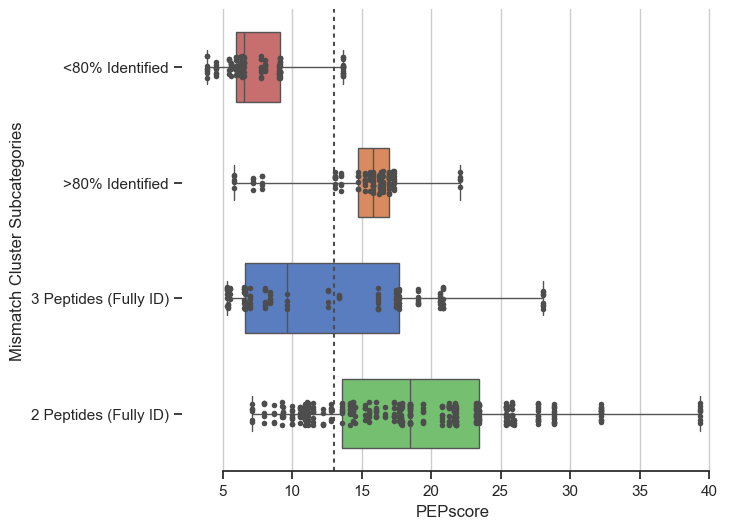

In [285]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(7,6))

plt1 = sns.boxplot(
    data = mis,
    x = 'PEPscore(new)',
    y = 'Mismatch Sub-Category',
    hue = 'Mismatch Sub-Category',
    order=['<80% Identified', '>80% Identified', '3 Peptides (Fully ID)','2 Peptides (Fully ID)'],
    whis=[0, 100], 
    width=.6, 
    palette="muted"
)

sns.stripplot(
    data = mis,
    x = 'PEPscore(new)',
    y = 'Mismatch Sub-Category',
    size = 4,
    color = '.3'
)

ax.xaxis.grid(True)
ax.set(ylabel="Mismatch Cluster Subcategories", xlabel='PEPscore')
sns.despine(trim=True, left=True)
ax.axvline(13, color=".3", dashes=(2, 2))


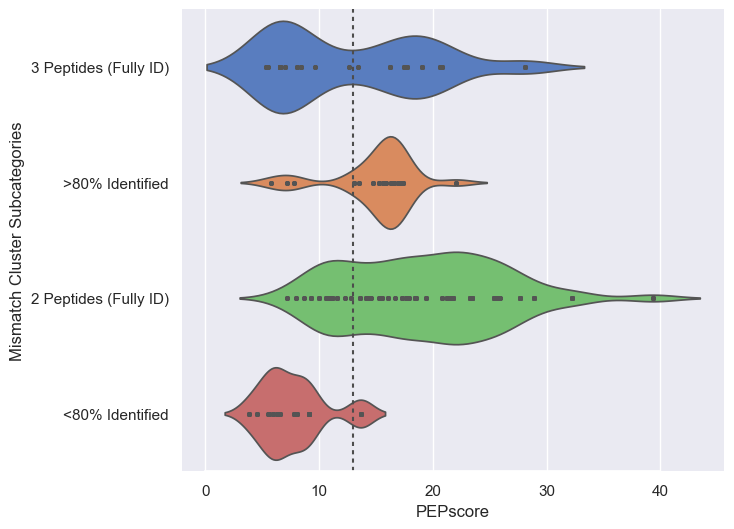

In [289]:
sns.set_theme()

f, ax = plt.subplots(figsize=(7,6))

plt2 = sns.violinplot(
    data = mis,
    x = 'PEPscore(new)',
    y = 'Mismatch Sub-Category',
    hue = 'Mismatch Sub-Category',
    palette = 'muted',
    inner='point'
)

ax.xaxis.grid(True)
ax.set(ylabel="Mismatch Cluster Subcategories", xlabel='PEPscore')
sns.despine(trim=True, left=True)

ax.axvline(13, color=".3", dashes=(2, 2))

